In [1]:
import json
import pandas as pd
import os

import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

sns.set()
sns.set_context('talk')

In [2]:


def parse_data():
    output_files = os.listdir('./StereoSet/code/output')
    
    score_types = ['intrasentence', 'intersentence']
    score_mapping_dict = {'intrasentence': 'local', 'intersentence':'global'}

    def parse_single_output(output, model_name):
        data = []
        for score_type in score_types:
            for bias in output[score_type].keys():
                entry = output[score_type][bias]
                entry['bias'] = bias
                entry['score_type'] = score_mapping_dict[score_type]
                entry['model_name'] = model_name
                data.append(entry)
        return data
                
    all_data = []
    for file in output_files:
        with open(f'./StereoSet/code/output/{file}') as fin:
            a = json.load(fin)
            model_name = file.split('_')[:-1]
            model_name = '-'.join(model_name)

            data = parse_single_output(a, model_name)
            all_data.extend(data)

    return pd.DataFrame(all_data)

df = parse_data()
# df.sort_values('model_name', inplace=True)
df.head()

,Count,LM Score,SS Score,ICAT Score,bias,score_type,model_name
0,765.0,86.925118,60.730462,68.270184,gender,local,multiberts-seed-17
1,2430.0,83.599935,63.035572,61.804475,profession,local,multiberts-seed-17
2,2886.0,85.003119,59.071124,69.581643,race,local,multiberts-seed-17
3,237.0,89.126437,56.643678,77.283890,religion,local,multiberts-seed-17
4,2106.0,84.870137,60.694472,66.717311,overall,local,multiberts-seed-17


## Analysis of local bias stochastic training

In [3]:
temp = df[
     (df['model_name'].str.contains('multi'))
]

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


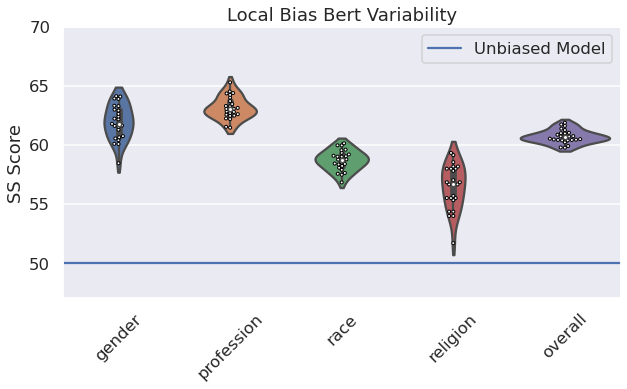

In [4]:
plt.figure(figsize=(10, 5))
plt.title('Local Bias Bert Variability')

plot_data = temp[temp['score_type']!='global'][['SS Score', 'bias']]

sns.swarmplot(
    plot_data['bias'],
    plot_data['SS Score'],
    color='white', 
    edgecolor='black',
    linewidth=1,
    s=3
)

sns.violinplot(plot_data['bias'] ,plot_data['SS Score'], 
               label='score distribution', cut=True)
plt.plot([-1,5], [50,50], label='Unbiased Model')
plt.xlabel('')
plt.ylim(47, 70)
plt.xticks(rotation=45)
plt.legend()

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


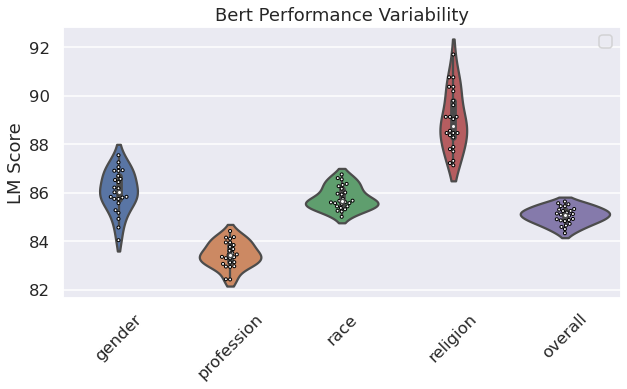

In [5]:
plt.figure(figsize=(10, 5))
plt.title('Bert Performance Variability')

plot_data = temp[temp['score_type']!='global'][['LM Score', 'bias']]

sns.swarmplot(
    plot_data['bias'],
    plot_data['LM Score'],
    color='white', 
    edgecolor='black',
    linewidth=1,
    s=3
)

sns.violinplot(plot_data['bias'] ,plot_data['LM Score'], 
               label='score distribution', cut=True)
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend()

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


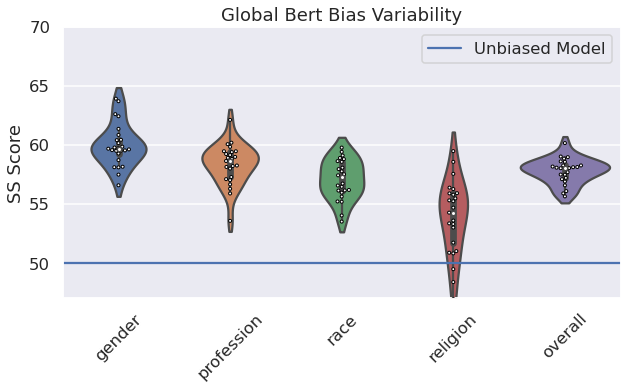

In [6]:
plt.figure(figsize=(10, 5))
plt.title('Global Bert Bias Variability')

plot_data = temp[temp['score_type']!='local'][['SS Score', 'bias']]

sns.swarmplot(
    plot_data['bias'],
    plot_data['SS Score'],
    color='white', 
    edgecolor='black',
    linewidth=1,
    s=3
)

sns.violinplot(plot_data['bias'] ,plot_data['SS Score'], 
               label='score distribution',cut=True)
plt.plot([-1,5], [50,50], label='Unbiased Model')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylim(47, 70)
plt.legend()

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.19528737236322763, 0.34953198172790784)

<Figure size 360x360 with 0 Axes>

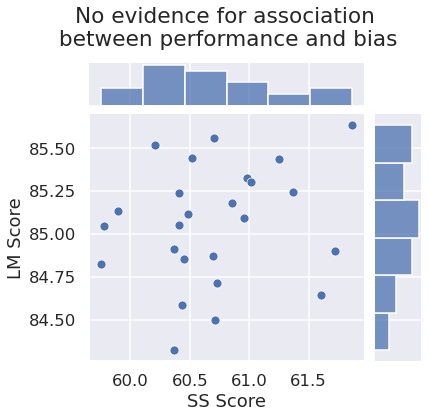

In [7]:
plt.figure(figsize=(5,5))

plot_data = temp[
    (temp['score_type'] == 'local') &
    (temp['bias'].str.contains('overall'))
]

sns.jointplot(plot_data['SS Score'], plot_data['LM Score'], kind='scatter')
plt.subplots_adjust(top=0.85)
plt.suptitle('No evidence for association\n between performance and bias')
pearsonr(plot_data['SS Score'], plot_data['LM Score'])

## Analyze size of model impact on training

In [8]:
size_df = df[df['model_name'].isin(
    ['bert-base-uncased', 'bert-large-uncased', 
#      'mobilebert-uncased'
    ]
)]

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


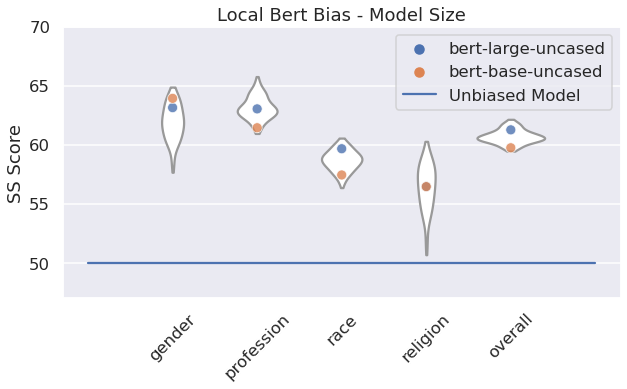

In [9]:
plt.figure(figsize=(10, 5))
plt.title('Local Bert Bias - Model Size')

plot_data = temp[temp['score_type']!='global'][['SS Score', 'bias']]
size_plot_data = size_df[size_df['score_type']!='global']

sns.violinplot(plot_data['bias'] ,plot_data['SS Score'], 
               label='score distribution', color='white',
               inner=None,cut=True)

sns.scatterplot(
    size_plot_data['bias'], 
    size_plot_data['SS Score'],
    hue=size_plot_data['model_name'],
    s=100,
    alpha=0.8
)

plt.plot([-1,5], [50,50], label='Unbiased Model')


plt.xlabel('')
plt.ylim(47,70)
plt.xticks(rotation=45)
plt.legend()

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


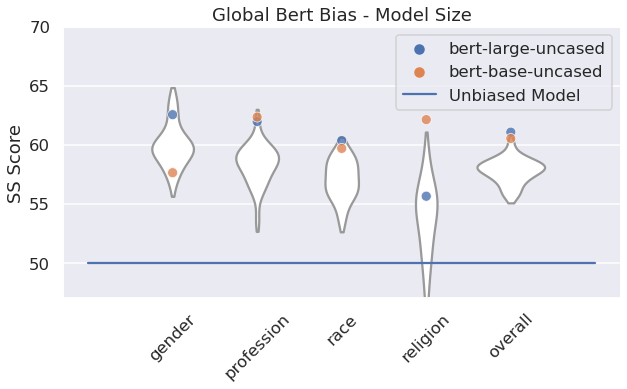

In [10]:
plt.figure(figsize=(10, 5))
plt.title('Global Bert Bias - Model Size')

plot_data = temp[temp['score_type']!='local'][['SS Score', 'bias']]
size_plot_data = size_df[size_df['score_type']!='local']

sns.violinplot(plot_data['bias'] ,plot_data['SS Score'], 
               label='score distribution', color='white',
              inner=None, cut=True)

sns.scatterplot(
    size_plot_data['bias'], 
    size_plot_data['SS Score'],
    hue=size_plot_data['model_name'],
    s=100,
    alpha=0.8
)

plt.plot([-1,5], [50,50], label='Unbiased Model')
plt.xlabel('')
plt.ylim(47,70)

plt.xticks(rotation=45)
plt.legend()

## Analyze impact of training data

In [11]:
data_df = df[df['model_name'].isin([
   'bert-base-cased', 'roberta-base',
#      'bert-large-cased', 'roberta-large', 
    ]
)]
# data_df.sort_values('model_name', inplace=True)

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


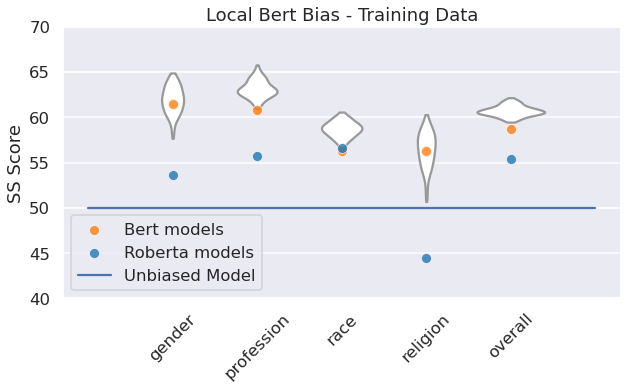

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Local Bert Bias - Training Data')

plot_data = temp[temp['score_type']!='global'][['SS Score', 'bias']]
size_plot_data = data_df[data_df['score_type']!='global']
sns.violinplot(plot_data['bias'] ,plot_data['SS Score'], 
               label='score distribution', color='white',
               inner=None,cut=True)

sns.scatterplot(
    data=size_plot_data[size_plot_data['model_name'].str.startswith('bert')],
    x='bias', 
    y='SS Score',
    color='tab:orange',
    s=100,
    alpha=0.8,
    label='Bert models',
#     style='model_name',
#     legend=None
)

sns.scatterplot(
    data=size_plot_data[size_plot_data['model_name'].str.startswith('robert')],
    x='bias', 
    y='SS Score',
    color='tab:blue',
    s=100,
    alpha=0.8,
#     style='model_name',
    label='Roberta models',
#     legend=None
)


plt.plot([-1,5], [50,50], label='Unbiased Model')


plt.xlabel('')
plt.ylim(40,70)
plt.xticks(rotation=45)
plt.legend(loc=3)

# Look at the other Metric

In [13]:
def parse_evaluate_llm_bias_data():
    output_files = os.listdir('./evaluate-bias-in-mlm/outputs/')
    
    def parse_single_output_llm_bias(file_name):
        tdf = pd.read_csv(
            f'./evaluate-bias-in-mlm/outputs/{file_name}', 
            sep=':',
            names=['metric','score']

        )
#         tdf = tdf.T.reset_index()
        split_name = file_name.split('_')
        dataset = split_name[0]
        method = split_name[1]
        model_name = "-".join(split_name[2:-1])
#         tdf.columns = tdf.iloc[0]
#         tdf.drop(tdf.index[0], inplace=True)
        tdf['dataset'] = dataset
        tdf['method'] = method
        tdf['model_name'] = model_name
        return tdf
    dfs= []
    for file_name in output_files:
        tdf = parse_single_output_llm_bias(file_name)
        dfs.append(tdf)
        
    return pd.concat(dfs)
edf = parse_evaluate_llm_bias_data()
print(set(edf['model_name']))
print(set(edf['method']))
print(set(edf['dataset']))

{'roberta-base', 'multiberts-seed-22', 'multiberts-seed-3', 'multiberts-seed-18', 'multiberts-seed-10', 'multiberts-seed-20', 'roberta-large', 'multiberts-seed-23', 'bert-large-uncased', 'multiberts-seed-19', 'multiberts-seed-9', 'bert-base-uncased', 'multiberts-seed-11', 'multiberts-seed-16', 'mobilebert-uncased', 'multiberts-seed-4', 'multiberts-seed-6', 'multiberts-seed-21', 'multiberts-seed-15', 'multiberts-seed-17', 'multiberts-seed-12', 'multiberts-seed-13', 'multiberts-seed-5', 'multiberts-seed-2', 'multiberts-seed-1', 'multiberts-seed-0', 'multiberts-seed-8', 'bert-base-cased', 'bert-large-cased', 'multiberts-seed-24', 'multiberts-seed-7', 'multiberts-seed-14'}
{'sss', 'cps', 'aula', 'aul'}
{'cp', 'ss'}


In [14]:
edf

,metric,score,dataset,method,model_name
0,Bias score,60.26,ss,cps,multiberts-seed-3
1,gender,63.14,ss,cps,multiberts-seed-3
2,profession,61.98,ss,cps,multiberts-seed-3
3,race,57.59,ss,cps,multiberts-seed-3
4,religion,65.82,ss,cps,multiberts-seed-3
...,...,...,...,...,...
6,race-color,56.98,cp,cps,multiberts-seed-12
7,religion,66.67,cp,cps,multiberts-seed-12
8,sexual-orientation,71.43,cp,cps,multiberts-seed-12
9,socioeconomic,60.47,cp,cps,multiberts-seed-12


In [15]:
edf[edf['metric'] == 'Accuracy'].groupby(['dataset','method']).mean()

score
dataset method           
cp      aul     87.024375
        aula    87.024375
        cps     61.466250
        sss      8.944375
ss      aul     80.750000
        aula    80.750000
        cps     56.454062
        sss      2.448437

## Two implementations are not identical

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.5217721224711922, 2.594454727066434e-08)


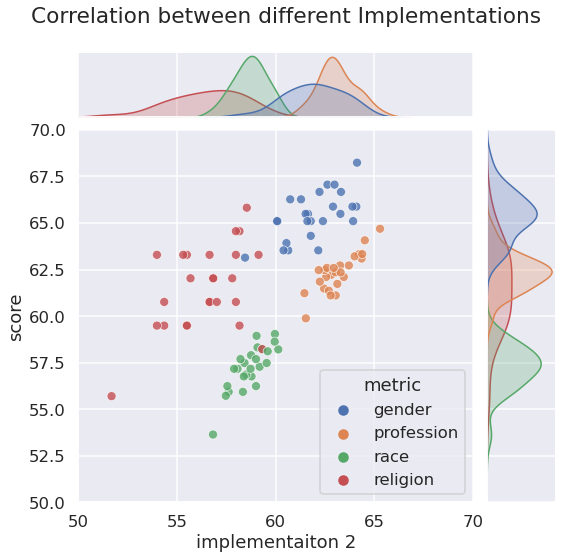

In [16]:
# edf[(edf['model_name']=='multiberts-seed-1') & (edf['dataset'] == 'ss') & (edf['method'] == 'sss')]
# df[df['model_name'] == 'multiberts-seed-1']

corr_df = pd.merge(
    temp[temp['score_type'] == 'local'][['SS Score', 'bias', 'model_name']],
    edf[
        (edf['model_name'].str.contains('multiberts'))
        & (edf['dataset'] == 'ss')
        & (edf['method'] == 'sss')
       ][['model_name', 'metric','score']],
    left_on=['model_name', 'bias'],
    right_on=['model_name', 'metric'])

# plt.figure(figsize=(10,10))

ax = sns.jointplot(
    corr_df['SS Score'], corr_df['score'], alpha=0.8, 
    hue=corr_df['metric'], size=8
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Correlation between different Implementations')
ax.ax_joint.set_xlabel('implementaiton 1')
ax.ax_joint.set_xlabel('implementaiton 2')
ax.ax_joint.set_xlim(50, 70)
ax.ax_joint.set_ylim(50, 70)

print(pearsonr(corr_df['SS Score'], corr_df['score']))

### Reproduce results for new scores

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


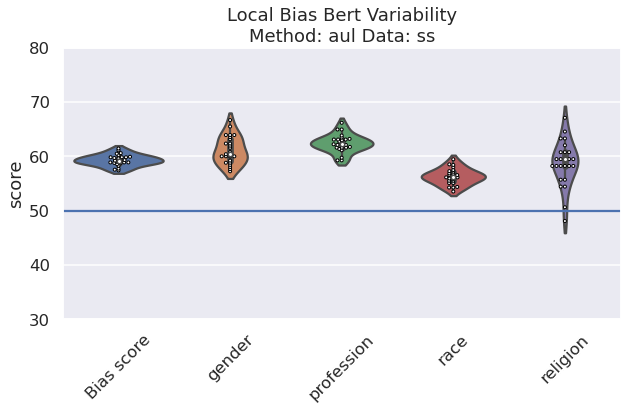

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


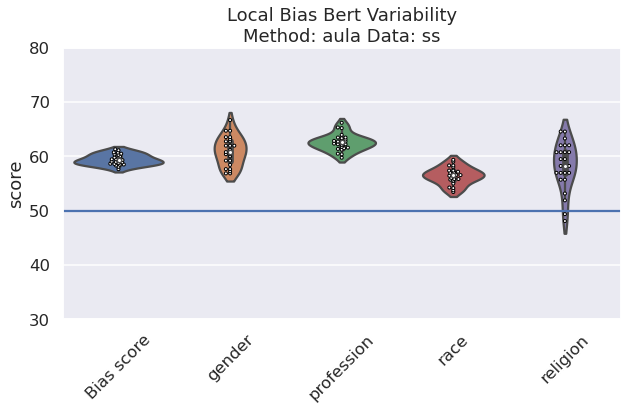

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


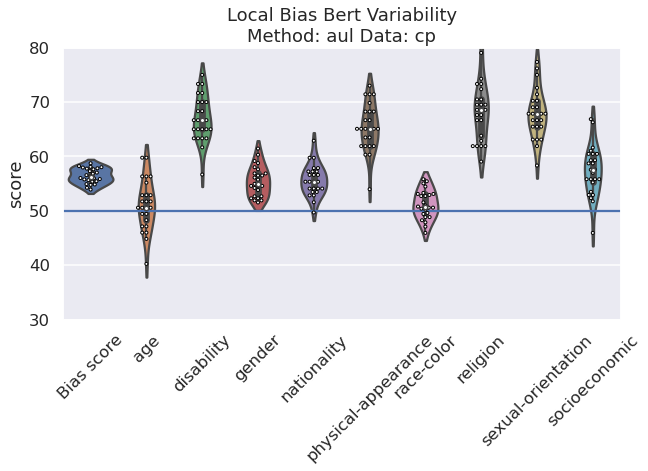

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


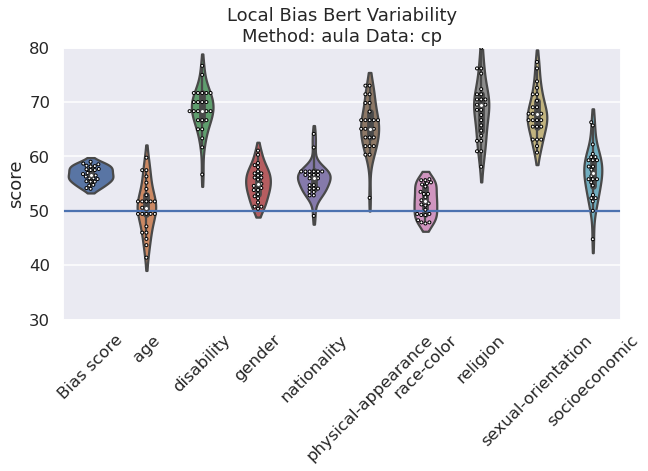

In [17]:
methods = ['aul', 'aula']
datasets = ['ss', 'cp']
for dataset in datasets:
    for method in methods:
        
        plt.figure(figsize=(10, 5))
        plt.title(f"Local Bias Bert Variability\n"
                  f"Method: {method} Data: {dataset}")

        plot_edf = edf[
            (edf['method']== method) & (edf['dataset'] == dataset)
            & (edf['metric'] != 'Accuracy')
            & (edf['model_name'].str.contains('multibert'))
        ]
        x = 'metric'
        y = 'score'

        sns.swarmplot(
            plot_edf[x],
            plot_edf[y],
            color='white', 
            edgecolor='black',
            linewidth=1,
            s=3
        )

        sns.violinplot(plot_edf[x] ,plot_edf[y], 
                       label='score distribution', cut=True)
        plt.plot(
            [-.5, len(set(plot_edf[x])) -.5], [50,50], 
            label='Unbiased Model')


        plt.xlabel('')
        plt.ylim(30,80)
        plt.xticks(rotation=45)
        plt.xlim(-.5, len(set(plot_edf[x])) -.5)
        plt.show()

In [18]:
set(edf['model_name'])

{'bert-base-cased',
 'bert-base-uncased',
 'bert-large-cased',
 'bert-large-uncased',
 'mobilebert-uncased',
 'multiberts-seed-0',
 'multiberts-seed-1',
 'multiberts-seed-10',
 'multiberts-seed-11',
 'multiberts-seed-12',
 'multiberts-seed-13',
 'multiberts-seed-14',
 'multiberts-seed-15',
 'multiberts-seed-16',
 'multiberts-seed-17',
 'multiberts-seed-18',
 'multiberts-seed-19',
 'multiberts-seed-2',
 'multiberts-seed-20',
 'multiberts-seed-21',
 'multiberts-seed-22',
 'multiberts-seed-23',
 'multiberts-seed-24',
 'multiberts-seed-3',
 'multiberts-seed-4',
 'multiberts-seed-5',
 'multiberts-seed-6',
 'multiberts-seed-7',
 'multiberts-seed-8',
 'multiberts-seed-9',
 'roberta-base',
 'roberta-large'}

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

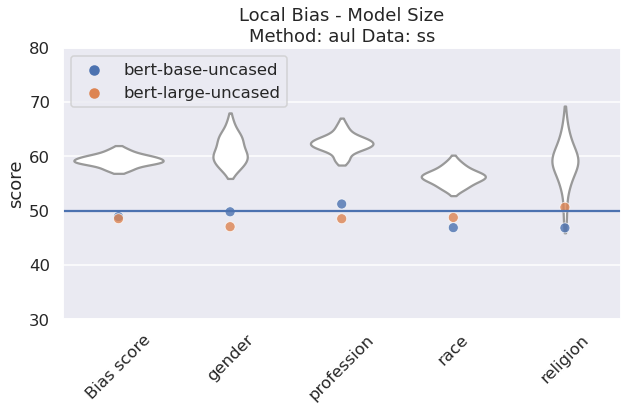

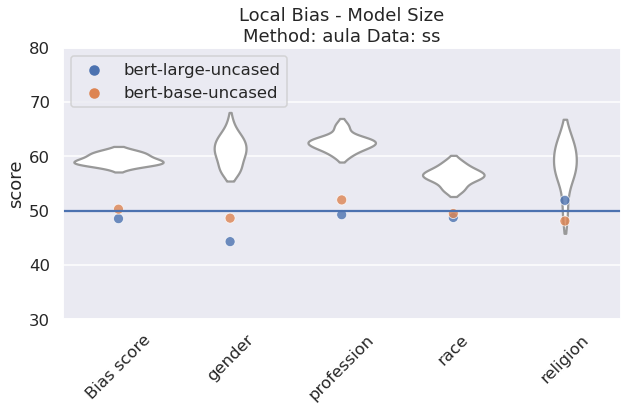

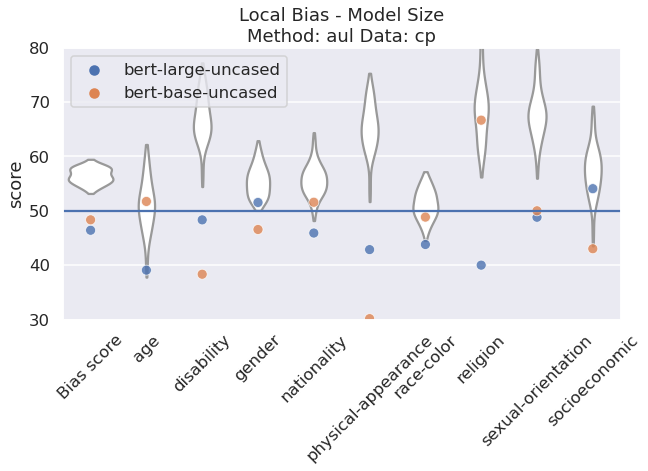

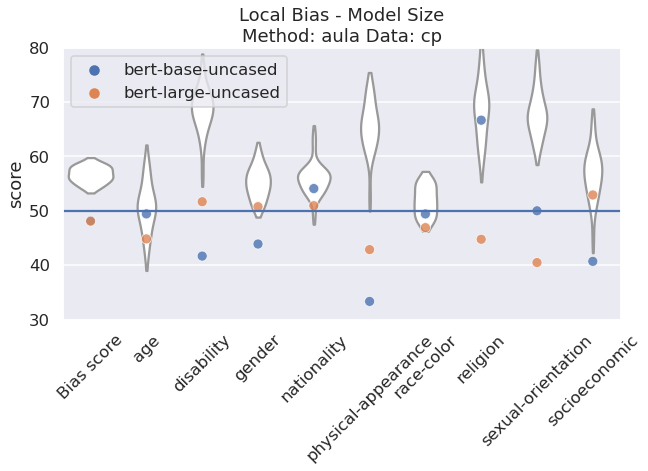

In [19]:
for dataset in datasets:
    for method in methods:
        plt.figure(figsize=(10, 5))
        plt.title(f"Local Bias - Model Size\n"
                  f"Method: {method} Data: {dataset}")


        plot_edf = edf[
            (edf['method']== method) & (edf['dataset'] == dataset)
            & (edf['metric'] != 'Accuracy')
            & (edf['model_name'].str.contains('multibert'))
        ]

        size_df = edf[
            (edf['method']== method) & (edf['dataset'] == dataset)
            & (edf['metric'] != 'Accuracy')
            & (edf['model_name'].isin(
                ['bert-large-uncased', 'bert-base-uncased']
            ))
        ]


        sns.violinplot(plot_edf[x] ,plot_edf[y], 
                       label='score distribution',
                       cut=True, color='white', inner=None)

        sns.scatterplot(
            data=size_df,
            x=x, 
            y=y,
            hue='model_name',
            s=100,
            alpha=0.8,
#             label='Bert models',
        #     style='model_name',
            legend='brief'
        )
        plt.plot(
            [-.5, len(set(size_df[x])) -.5], [50,50], 
#             label='Unbiased Model'
        )


        plt.xlabel('')
        plt.ylim(30,80)
        plt.xticks(rotation=45)
        plt.xlim(-.5, len(set(size_df[x])) -.5)
        plt.legend(loc=2)

/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/h/phil/anaconda3/envs/stereoset/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

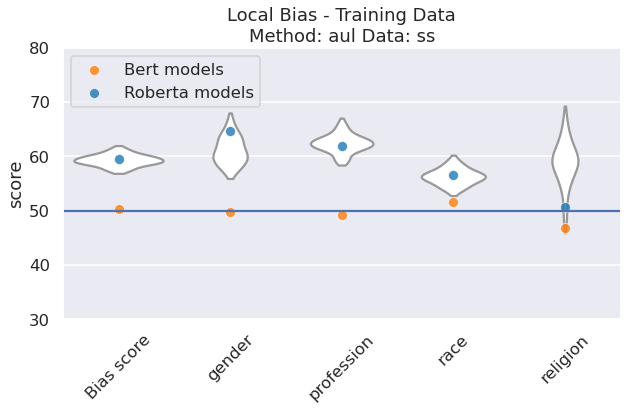

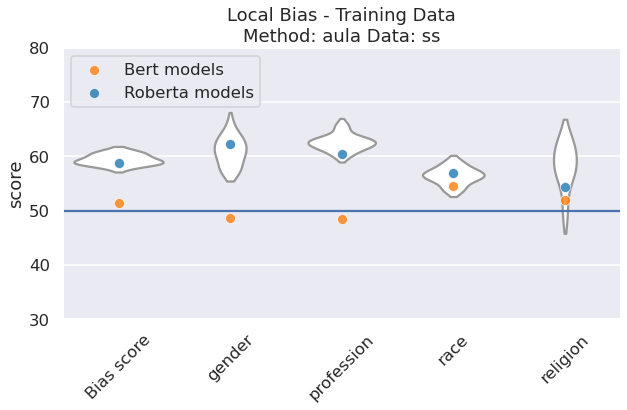

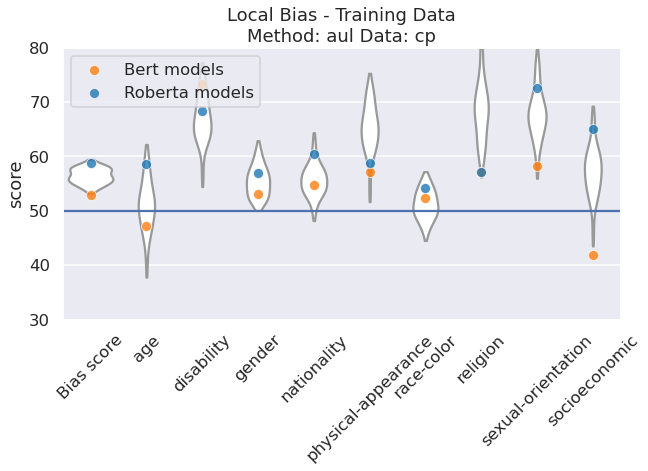

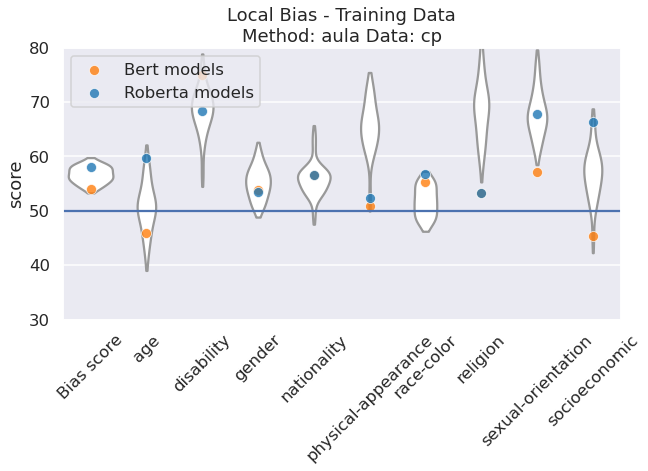

In [20]:
for dataset in datasets:
    for method in methods:
        plt.figure(figsize=(10, 5))
        plt.title(f"Local Bias - Training Data\n"
                  f"Method: {method} Data: {dataset}")


        plot_edf = edf[
            (edf['method']== method) & (edf['dataset'] == dataset)
            & (edf['metric'] != 'Accuracy')
            & (edf['model_name'].str.contains('multibert'))
        ]

        data_edf = edf[
            (edf['method']== method) & (edf['dataset'] == dataset)
            & (edf['metric'] != 'Accuracy')
            & (edf['model_name'].isin(
                ['bert-base-cased', 'roberta-base']
            ))
        ]


        sns.violinplot(plot_edf[x] ,plot_edf[y], 
                       label='score distribution',
                       cut=True, color='white', inner=None)

        sns.scatterplot(
            data=data_edf[data_edf['model_name'].str.startswith('bert')],
            x=x, 
            y=y,
            color='tab:orange',
            s=100,
            alpha=0.8,
            label='Bert models',
        #     style='model_name',
        #     legend=None
        )

        sns.scatterplot(
            data=data_edf[data_edf['model_name'].str.startswith('roberta')],
            x=x, 
            y=y,
            color='tab:blue',
            s=100,
            alpha=0.8,
        #     style='model_name',
            label='Roberta models',
        #     legend=None
        )

        plt.plot(
            [-.5, len(set(data_edf[x])) -.5], [50,50], 
#             label='Unbiased Model'
        )


        plt.xlabel('')
        plt.ylim(30,80)
        plt.xticks(rotation=45)
        plt.xlim(-.5, len(set(data_edf[x])) -.5)
        plt.legend(loc=2)